In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from PIL import Image


In [2]:
import os

In [3]:
Smiley_X = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\smiley_X.npy")
Smiley_Y = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\smiley_Y.npy")
Smiley_X = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\smiley_noisy_X.npy")
Smiley_X = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\smiley_noisy_Y.npy")


In [4]:
labels = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\Smiley_X.npy")
labels = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\Smiley_Y.npy")
labels = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\smiley_noisy_X.npy")
labels = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\smiley_noisy_Y.npy")

# Find unique labels
unique_labels = np.unique(labels)

# Print the unique labels
print("Unique Labels:", unique_labels)

Unique Labels: [0. 1. 2.]


In [5]:
# Load the dataset and labels from the .npy files
data = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\smiley_noisy_X.npy")
labels = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\smiley_noisy_Y.npy")

# Flatten the data array to make it 2-dimensional
data_flat = data.reshape(data.shape[0], -1)

# Convert the NumPy arrays to Pandas DataFrame
df_SmileyX = pd.DataFrame(data_flat)
df_SmileyY = pd.DataFrame(labels, columns=['Label'])

# Concatenate the data and labels along the columns (axis=1)
df_smiley_dataset = pd.concat([df_SmileyX, df_SmileyY], axis=1)

# Print the resulting Pandas DataFrame
print(df_smiley_dataset)




       0    1    2    3    4    5    6    7    8    9  ...   72   73   74  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
199  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
200  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
201  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
202  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
203  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

      75   76   77   78   79   80  Label  
0    0.0  0.0  0.0  0.0  0.0  0.

In [6]:
df_SmileyX.head()


,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_SmileyY.head()

,Label
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0


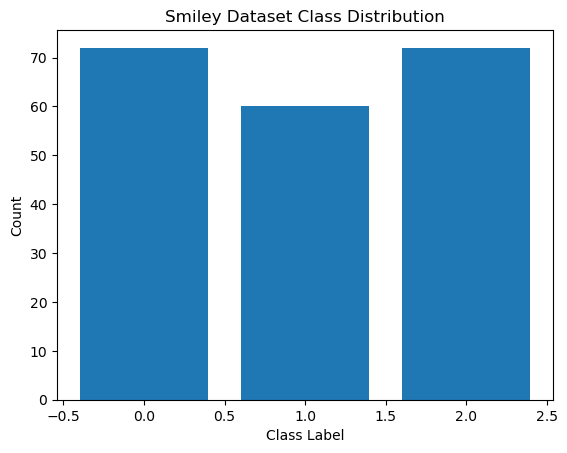

In [8]:
# Count the occurrences of each label in the dataset
label_counts = df_smiley_dataset['Label'].value_counts()


# Plot the bar graph
plt.bar(label_counts.index, label_counts.values), 
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Smiley Dataset Class Distribution')
plt.show()




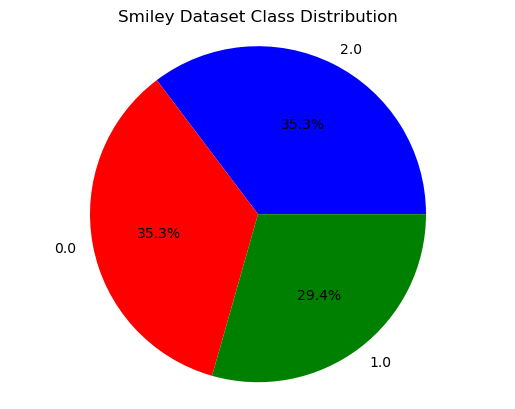

In [9]:
# Count the occurrences of each label in the dataset
label_counts = df_smiley_dataset['Label'].value_counts()

# Plot the pie chart
plt.pie(label_counts, labels=label_counts.index, colors=['blue', 'red', 'green'], autopct='%1.1f%%')
plt.title('Smiley Dataset Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


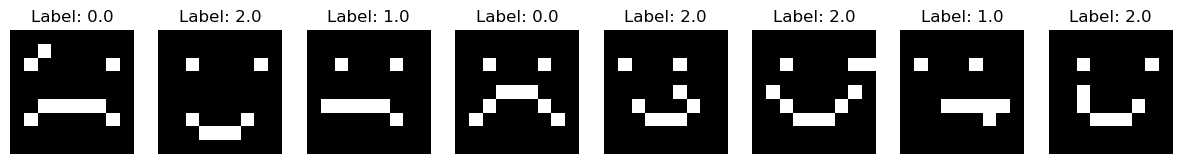

In [10]:
# Get the number of samples in the dataset
num_samples = data.shape[0]

# Define the number of sample images to display
num_samples_to_display = 8

# Check if the number of samples is smaller than the number of images to display
if num_samples < num_samples_to_display:
    num_samples_to_display = num_samples

# Randomly select indices to get the sample images
random_indices = np.random.choice(num_samples, num_samples_to_display, replace=False)

# Plot the sample images
fig, axes = plt.subplots(1, num_samples_to_display, figsize=(15, 5))

for i, index in enumerate(random_indices):
    image_data = data[index].reshape(9, 9)  # Reshape the flattened image data
    label = labels[index]

    # Plot the image
    axes[i].imshow(image_data, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.show()


In [11]:
# Function to find missing values in a dataset
def find_missing_values(dataset, dataset_name):
    missing_values_count = np.sum(np.isnan(dataset))
    if missing_values_count > 0:
        print(f"Dataset '{dataset_name}' has {missing_values_count} missing values.")
    else:
        print(f"Dataset '{dataset_name}' has no missing values.")

# Find missing values for Smiley_X and Smiley_Y datasets
find_missing_values(Smiley_X, "Smiley_X")
find_missing_values(Smiley_Y, "Smiley_Y")

Dataset 'Smiley_X' has no missing values.
Dataset 'Smiley_Y' has no missing values.


In [12]:
from scipy import stats
def detect_outliers_zscore(data, threshold=3):
    # Calculate the Z-scores for each data point
    z_scores = np.abs(stats.zscore(data))

    # Find the indices of potential outliers based on the threshold
    outlier_indices = np.where(z_scores > threshold)

    return outlier_indices[0]

# Example usage
smiley_X = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\smiley_X.npy")

# Detect potential outliers
outlier_indices = detect_outliers_zscore(smiley_X)

if len(outlier_indices) > 0:
    print("Potential outliers found at indices:", outlier_indices)
else:
    print("No outliers found.")

Potential outliers found at indices: [ 44  44  45  45  46  46  47  47  56  56  57  57  58  58  59  59  69  70
  71  72  73  76  77  78  79  81  86  87  88  89  90  91  93  94  95  96
  97  98  99 100 101 102 104 105 106 108 109 110 111 112 112 113 113 113
 114 114 114 115 115 115 116 117 120 123 124 124 125 125 126 126 126 127
 127 127 128 130 131 132 133 134 135 137 138 140 141 143 144 146 147 150
 151 154 155 156 157 158 159 160 162 163 164 165 166 168 169 170 174 178
 179 180 180 180 181 181 181 182 182 182 183 183 184 185 186 187 188 189
 190 191 192 192 193 193 193 194 194 195 195 197 198 199 201]


In [13]:
def remove_outliers_zscore(data, threshold=3):
    # Calculate the mean and standard deviation of the data
    mean = np.mean(data)
    std_dev = np.std(data)

    # Calculate the Z-scores for each data point
    z_scores = np.abs((data - mean) / std_dev)

    # Find the indices of the outliers based on the threshold
    outlier_indices = np.where(z_scores > threshold)

    # Remove the outliers from the data
    cleaned_data = data[~np.isin(np.arange(len(data)), outlier_indices)]

    return cleaned_data

# Example usage
smiley_X = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\Smiley_X.npy")
cleaned_smiley_X = remove_outliers_zscore(smiley_X)

# Check if any outliers were removed
if len(cleaned_smiley_X) < len(smiley_X):
    print(f"Outliers removed. Original data length: {len(smiley_X)}, Cleaned data length: {len(cleaned_smiley_X)}")
else:
    print("No outliers found.")

No outliers found.


In [14]:
from scipy import stats
def detect_outliers_zscore(data, threshold=3):
    # Calculate the Z-scores for each data point
    z_scores = np.abs(stats.zscore(data))

    # Find the indices of potential outliers based on the threshold
    outlier_indices = np.where(z_scores > threshold)

    return outlier_indices[0]

# Example usage
smiley_Y = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\smiley_Y.npy")

# Detect potential outliers
outlier_indices = detect_outliers_zscore(smiley_Y)

if len(outlier_indices) > 0:
    print("Potential outliers found at indices:", outlier_indices)
else:
    print("No outliers found.")

No outliers found.


# Naive Bayes

'X_train' and 'X_test' have a shape of 4D. Since GaussianNB classifier is designed to handle 2-dimensional datasets, we'll have
to to flatten or reshape them into 2D arrays (each row representing a single image) before applying the Naive Bayes classifier.

In [15]:
# Flatten the 4-dimensional images into 2D arrays
num_samples = smiley_X.shape[0]
flattened_smiley_X = smiley_X.reshape(num_samples, -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(flattened_smiley_X, smiley_Y, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
class_names = ["Smiley 0", "Smiley 1", "Smiley 2"]
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.6585365853658537
              precision    recall  f1-score   support

    Smiley 0       0.91      0.67      0.77        15
    Smiley 1       0.38      0.67      0.48         9
    Smiley 2       0.79      0.65      0.71        17

    accuracy                           0.66        41
   macro avg       0.69      0.66      0.65        41
weighted avg       0.74      0.66      0.68        41



In [16]:
# Load your Smiley dataset with numerical features (replace this with your actual data)
smiley_features = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\smiley_X.npy")

# Flatten the multi-dimensional array to a 2D array
num_samples = smiley_features.shape[0]
flattened_smiley_features = smiley_features.reshape(num_samples, -1)

# Calculate the correlation matrix, handling zero-variance features and NaNs
valid_features = np.std(flattened_smiley_features, axis=0) != 0
correlation_matrix = np.corrcoef(flattened_smiley_features[:, valid_features], rowvar=False)

# Fill any NaN values in the correlation matrix with zeros or any other appropriate value
correlation_matrix[np.isnan(correlation_matrix)] = 0

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
[[ 1.         -0.01112527 -0.0157724  ... -0.0157724  -0.02241679
  -0.0157724 ]
 [-0.01112527  1.         -0.00698379 ... -0.00698379 -0.00992583
  -0.00698379]
 [-0.0157724  -0.00698379  1.         ... -0.00990099 -0.01407195
  -0.00990099]
 ...
 [-0.0157724  -0.00698379 -0.00990099 ...  1.         -0.01407195
  -0.00990099]
 [-0.02241679 -0.00992583 -0.01407195 ... -0.01407195  1.
  -0.01407195]
 [-0.0157724  -0.00698379 -0.00990099 ... -0.00990099 -0.01407195
   1.        ]]


In [17]:
# Load your Smiley dataset with numerical features (replace this with your actual data)
smiley_features = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\smiley_Y.npy")

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(smiley_features, rowvar=False)

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
1.0


# K - Mean Clustering

ARI measures the similarity between two sets of labels, taking into account all pairs of samples and their agreement with 
the true class labels.

NMI measures the mutual information between two sets of labels while normalizing the result to be between 0 and 1.

The Adjusted Rand Index (ARI) for the K-means clustering on the smiley dataset is around 0.313, indicating moderate similarity with the true labels. A value close to 1 would represent a perfect clustering alignment. The Normalized Mutual Information (NMI) is approximately 0.408, suggesting a reasonable level of similarity between the clustering and true labels. A higher NMI value indicates better clustering performance. Overall, the K-means clustering partially captures the data's underlying patterns, but there is potential for improvement to achieve more accurate clustering results.

C:\Users\anush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Adjusted Rand Index (ARI): 0.31288134543314644
Normalized Mutual Information (NMI): 0.40829222303576546


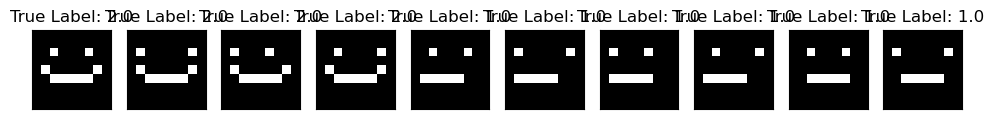

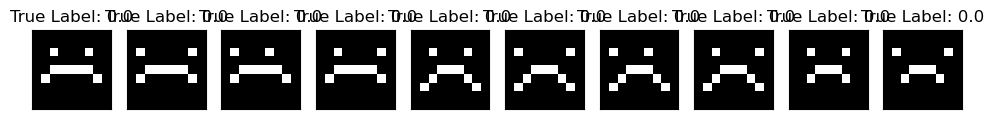

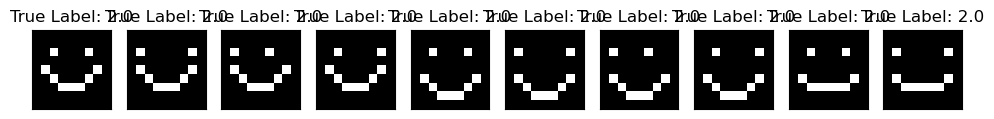

In [18]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import matplotlib.pyplot as plt
import os

# Set the environment variable to avoid the memory leak issue on Windows with MKL
os.environ['OMP_NUM_THREADS'] = '1'

# Load the Smiley_X and Smiley_y datasets
smiley_X = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\smiley_X.npy")
smiley_y = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\smiley_y.npy")

# Flatten the images into a 2D array (num_samples x num_features)
num_samples = smiley_X.shape[0]
flattened_smiley_X = smiley_X.reshape(num_samples, -1)

# Define the number of clusters (K) you want to create
num_clusters = 3

# Apply K-means clustering with explicit n_init value to suppress the FutureWarning
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(flattened_smiley_X)

# Compute ARI and NMI between cluster assignments and true labels
ari_score = adjusted_rand_score(smiley_y, cluster_labels)
nmi_score = normalized_mutual_info_score(smiley_y, cluster_labels)

print("Adjusted Rand Index (ARI):", ari_score)
print("Normalized Mutual Information (NMI):", nmi_score)

# Visualize the clustered images along with true labels
for cluster_id in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_samples = smiley_X[cluster_indices]
    cluster_true_labels = smiley_y[cluster_indices]

    # Plot the first 10 images from each cluster (you can adjust the number)
    fig, axes = plt.subplots(1, 10, figsize=(12, 1.2), subplot_kw={'xticks': [], 'yticks': []})
    for i in range(10):
        axes[i].imshow(cluster_samples[i], cmap='gray')
        axes[i].set_title("True Label: " + str(cluster_true_labels[i]))
    plt.show()


# Hierarchical Clustering (Agglomerative Clustering):

Adjusted Rand Index (ARI): 0.31288134543314644
Normalized Mutual Information (NMI): 0.4082922230357654


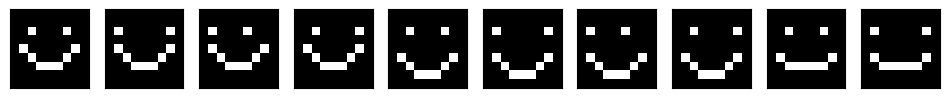

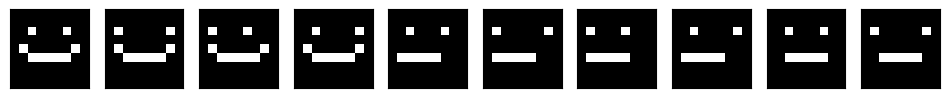

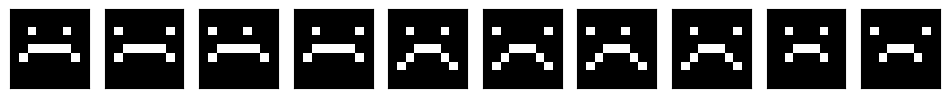

In [19]:

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Set the environment variable to avoid memory leak issue on Windows with MKL
os.environ['OMP_NUM_THREADS'] = '1'


# Flatten the images into a 2D array (num_samples x num_features)
num_samples = smiley_X.shape[0]
flattened_smiley_X = smiley_X.reshape(num_samples, -1)

# Define the number of clusters (K) you want to create
num_clusters = 3

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = agg_clustering.fit_predict(flattened_smiley_X)

# Evaluate the clustering using Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
ari = adjusted_rand_score(smiley_Y, cluster_labels)
nmi = normalized_mutual_info_score(smiley_Y, cluster_labels)
print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)

# Visualize the clustered images
for cluster_id in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_samples = smiley_X[cluster_indices]

    # Plot the first 10 images from each cluster (you can adjust the number)
    fig, axes = plt.subplots(1, 10, figsize=(12, 1.2), subplot_kw={'xticks': [], 'yticks': []})
    for i in range(min(10, len(cluster_samples))):
        axes[i].imshow(cluster_samples[i], cmap='gray')
    plt.show()


# Expectation-Maximization clustering

The ARI value of 0.1738 suggests limited alignment between the clustering results and the ground truth. This modest performance indicates that the clustering algorithm may not have fully captured the true patterns present in the data.

The NMI value of 0.2621 indicates a relatively higher level of agreement between the clustering results and the ground truth compared to the ARI. However, it is still considered moderate, suggesting that the clustering algorithm's performance is not highly accurate in capturing the underlying structure of the data.

C:\Users\anush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Adjusted Rand Index (ARI): 0.1738089537945894
Normalized Mutual Information (NMI): 0.2620522555057271


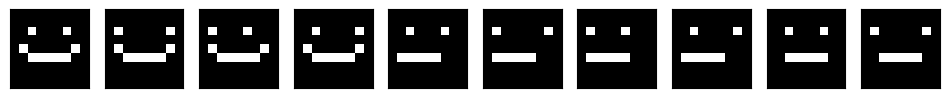

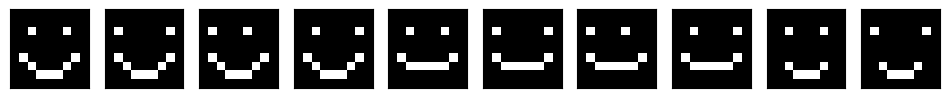

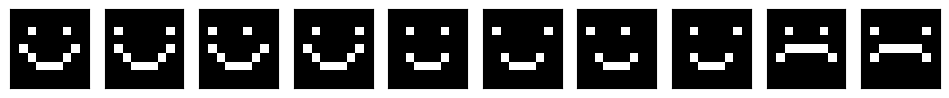

In [20]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


# Set the environment variable to avoid memory leak issue on Windows with MKL
os.environ['OMP_NUM_THREADS'] = '1'


# Flatten the images into a 2D array (num_samples x num_features)
num_samples = smiley_X.shape[0]
flattened_smiley_X = smiley_X.reshape(num_samples, -1)

# Define the number of clusters (K) you want to create
num_clusters = 3

# Apply Gaussian Mixture Model (GMM) clustering
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm.fit(flattened_smiley_X)

# Predict cluster labels for each data point
cluster_labels = gmm.predict(flattened_smiley_X)

# Evaluate the clustering using Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
ari = adjusted_rand_score(smiley_Y, cluster_labels)
nmi = normalized_mutual_info_score(smiley_Y, cluster_labels)
print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)

# Visualize the clustered images
for cluster_id in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_samples = smiley_X[cluster_indices]

    # Plot the first 10 images from each cluster (you can adjust the number)
    fig, axes = plt.subplots(1, 10, figsize=(12, 1.2), subplot_kw={'xticks': [], 'yticks': []})
    for i in range(min(10, len(cluster_samples))):
        axes[i].imshow(cluster_samples[i], cmap='gray')
    plt.show()


When the number of cluster is increased, we can observe that the ARI has gone up 0.173 to 0.25 and NMI has gone up 0.262 to 0.447, which shows that the accuracy has slightly increased.

C:\Users\anush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Adjusted Rand Index (ARI): 0.23747944918189956
Normalized Mutual Information (NMI): 0.40880661795663714


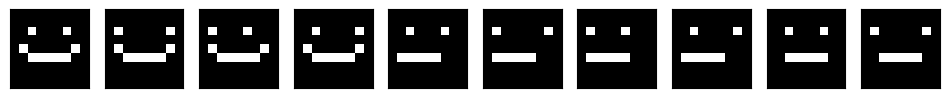

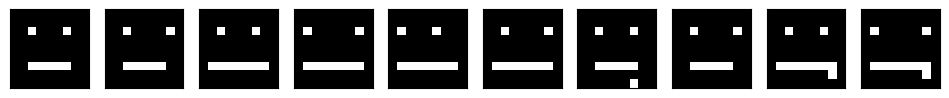

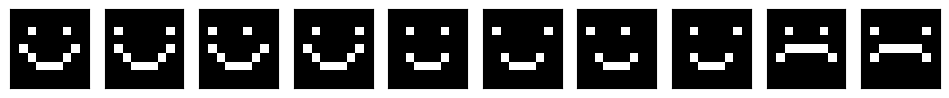

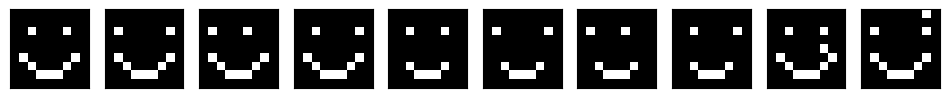

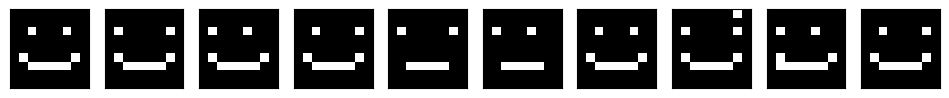

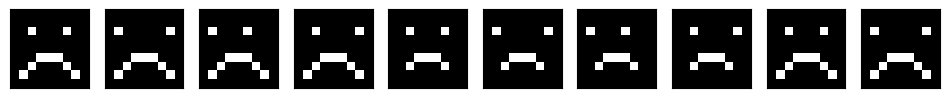

In [21]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


# Set the environment variable to avoid memory leak issue on Windows with MKL
os.environ['OMP_NUM_THREADS'] = '1'


# Flatten the images into a 2D array (num_samples x num_features)
num_samples = smiley_X.shape[0]
flattened_smiley_X = smiley_X.reshape(num_samples, -1)

# Define the number of clusters (K) you want to create
num_clusters = 6

# Apply Gaussian Mixture Model (GMM) clustering
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm.fit(flattened_smiley_X)

# Predict cluster labels for each data point
cluster_labels = gmm.predict(flattened_smiley_X)

# Evaluate the clustering using Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
ari = adjusted_rand_score(smiley_Y, cluster_labels)
nmi = normalized_mutual_info_score(smiley_Y, cluster_labels)
print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)

# Visualize the clustered images
for cluster_id in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_samples = smiley_X[cluster_indices]

    # Plot the first 10 images from each cluster (you can adjust the number)
    fig, axes = plt.subplots(1, 10, figsize=(12, 1.2), subplot_kw={'xticks': [], 'yticks': []})
    for i in range(min(10, len(cluster_samples))):
        axes[i].imshow(cluster_samples[i], cmap='gray')
    plt.show()


# Part 3: Supervised Learning

we are spliting the data into training and test sets using scikit-learn's train_test_split function to get a test set 

In [22]:
# Split the data into training and test sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(smiley_X, smiley_Y, test_size=0.2, random_state=42)

# Print the sizes of the training and test sets
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 163
Test set size: 41


We can see the Decision trees (the J48 algorithm) plotted below using the training set.
We can see that the accuracy for this is 0.975 which is on the higher accuracy end

Accuracy: 0.975609756097561


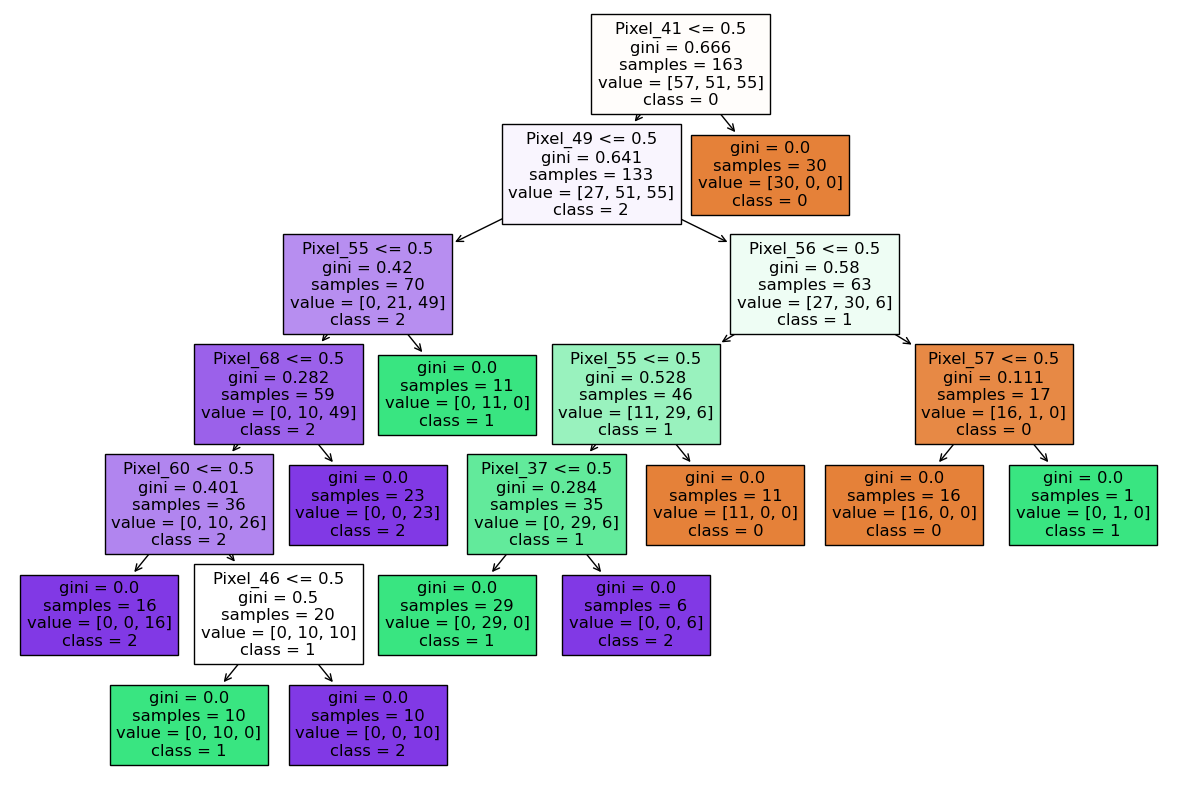

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

#Flatten the images into a 2D array (num_samples x num_features) and concatenate smiley_Y as the last column (class labels):
num_samples = smiley_X.shape[0]
num_features = smiley_X.shape[1] * smiley_X.shape[2]
flattened_smiley_X = smiley_X.reshape(num_samples, -1)
data = np.concatenate((flattened_smiley_X, smiley_Y[:, None]), axis=1)

#Split the data into a training set and a test set:
X_train, X_test, y_train, y_test = train_test_split(flattened_smiley_X, smiley_Y, test_size=0.2, random_state=42)

#Create an instance of the J48 (DecisionTreeClassifier) classifier:
classifier = DecisionTreeClassifier()

#Train the classifier on the training set:
classifier.fit(X_train, y_train)

#Make predictions on the test set:
y_pred = classifier.predict(X_test)

#Calculate the accuracy of the classifier:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Plot the decision tree:
plt.figure(figsize=(15, 10))
plot_tree(classifier, filled=True, feature_names=[f"Pixel_{i}" for i in range(num_features)], class_names=["0", "1", "2"])
plt.show()



Average accuracy  10-fold cross-validation:

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# Assuming you have already split the data and have X_train and y_train
# X_train: Training features
# y_train: Training labels

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Perform 10-fold cross-validation
num_folds = 10
accuracy_scores = cross_val_score(naive_bayes_classifier, X_train, y_train, cv=num_folds)

# Calculate the average accuracy
average_accuracy = np.mean(accuracy_scores)

print("Average accuracy on the training set using 10-fold cross-validation: {:.2f}%".format(average_accuracy * 100))



Average accuracy on the training set using 10-fold cross-validation: 75.48%


On repeating the experiment using training and testing data sets instead of the cross validation, we can see that accuracy on the test set is 97.56

Since the new data gives high accuracy and has a similar accuracy to the training set, we can conclude that the decision tree generalizes well to new data.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already split the data and have X_train, X_test, y_train, and y_test
# X_train: Training features
# X_test: Test features
# y_train: Training labels
# y_test: Test labels

# Create a J48 (Decision Tree) classifier
j48_classifier = DecisionTreeClassifier()

# Fit the classifier on the training data
j48_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = j48_classifier.predict(X_test)

# Calculate the accuracy of the classifier on the test data
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on the test set using J48 (Decision Tree) classifier: {:.2f}%".format(accuracy * 100))


Accuracy on the test set using J48 (Decision Tree) classifier: 97.56%


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Experiment with different parameters
max_depth_values = [None, 5]  # Try different values for max_depth
min_samples_leaf_values = [1, 5]  # Try different values for min_samples_leaf
min_impurity_decrease_values = [0.0, 0.1]  # Try different values for min_impurity_decrease
criterion_values = ["gini", "entropy"]  # Try different splitting criteria

for max_depth in max_depth_values:
    for min_samples_leaf in min_samples_leaf_values:
        for min_impurity_decrease in min_impurity_decrease_values:
            for criterion in criterion_values:
                # Create a J48 (Decision Tree) classifier with current parameters
                j48_classifier = DecisionTreeClassifier(
                    max_depth=max_depth,
                    min_samples_leaf=min_samples_leaf,
                    min_impurity_decrease=min_impurity_decrease,
                    criterion=criterion
                )

                # Fit the classifier on the training data
                j48_classifier.fit(X_train, y_train)

                # Make predictions on the test data
                y_pred = j48_classifier.predict(X_test)

                # Calculate the accuracy of the classifier on the test data
                accuracy = accuracy_score(y_test, y_pred)

                print(f"Parameters: max_depth={max_depth}, min_samples_leaf={min_samples_leaf}, "
                      f"min_impurity_decrease={min_impurity_decrease:.2f}, criterion={criterion}, "
                      f"Accuracy: {accuracy:.2f}")


Parameters: max_depth=None, min_samples_leaf=1, min_impurity_decrease=0.00, criterion=gini, Accuracy: 0.98
Parameters: max_depth=None, min_samples_leaf=1, min_impurity_decrease=0.00, criterion=entropy, Accuracy: 0.98
Parameters: max_depth=None, min_samples_leaf=1, min_impurity_decrease=0.10, criterion=gini, Accuracy: 0.59
Parameters: max_depth=None, min_samples_leaf=1, min_impurity_decrease=0.10, criterion=entropy, Accuracy: 0.95
Parameters: max_depth=None, min_samples_leaf=5, min_impurity_decrease=0.00, criterion=gini, Accuracy: 0.98
Parameters: max_depth=None, min_samples_leaf=5, min_impurity_decrease=0.00, criterion=entropy, Accuracy: 0.98
Parameters: max_depth=None, min_samples_leaf=5, min_impurity_decrease=0.10, criterion=gini, Accuracy: 0.59
Parameters: max_depth=None, min_samples_leaf=5, min_impurity_decrease=0.10, criterion=entropy, Accuracy: 0.95
Parameters: max_depth=5, min_samples_leaf=1, min_impurity_decrease=0.00, criterion=gini, Accuracy: 0.95
Parameters: max_depth=5, min

I have split the original dataset in such a way that 30% of the original data is moved into test data and 70% is used as training data

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have the original data: Smiley_X (features) and Smiley_Y (labels)

# Convert Smiley_X to a 2D array with one feature (reshape it)
X = Smiley_X.reshape(-1, 1)

# Split the data into training and testing sets, with 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, Smiley_Y, test_size=0.3, random_state=42)

# Print the sizes of the new training and testing sets
print("New training set size:", len(X_train))
print("New test set size:", len(X_test))

# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Calculate the accuracy of the classifier on the test data
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy on the training set: {:.2f}%".format(train_accuracy * 100))
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))


New training set size: 142
New test set size: 62
Accuracy on the training set: 100.00%
Accuracy on the test set: 100.00%



In this case, I have split the original dataset in such a way that 60% of the original data is moved into test data and 40% is used as training data

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming you have the original data: Smiley_X (features) and Smiley_Y (labels)

# Convert Smiley_X to a 2D array with one feature (reshape it)
X = Smiley_X.reshape(-1, 1)

# Split the data into training and testing sets, with 40% for training and 60% for testing
X_train, X_test, y_train, y_test = train_test_split(X, Smiley_Y, test_size=0.6, random_state=42)

# Print the sizes of the new training and testing sets
print("New training set size:", len(X_train))
print("New test set size:", len(X_test))

# Create a DecisionTreeClassifier with limited depth (max_depth) and other regularization parameters
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = dt_classifier.predict(X_train)

# Calculate the accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = dt_classifier.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Accuracy on the training set: {:.2f}%".format(train_accuracy * 100))
print("Accuracy on the test set: {:.2f}%".format(test_accuracy * 100))



New training set size: 81
New test set size: 123
Accuracy on the training set: 100.00%
Accuracy on the test set: 100.00%


We can observe Overfitting as we alter the percentage of data in testing and training sets as they are showing 100% accuracy

# Part 4. Neural Networks and Convolutional Neural Networks. 

we are using scikit-learn's LogisticRegression or LinearSVC along with cross_val_score for cross-validation. We are then comparing the accuracies for both scenarios.

based on the high accuracy achieved by the linear classifiers on the training and test sets, there is a hypothesis that the dataset might be linearly separable. However, further analysis and experimentation are required to confirm this and avoid overfitting.

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

# Assuming you have the original data: Smiley_X (features) and Smiley_Y (labels)

# Flatten the input data to 2-dimensional format
num_samples, height, width, channels = Smiley_X.shape
X_flattened = Smiley_X.reshape(num_samples, height * width * channels)

# Split the data into training and testing sets, with 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X_flattened, Smiley_Y, test_size=0.3, random_state=42)

# Create a Logistic Regression classifier
log_reg_classifier = LogisticRegression(random_state=42)

# Train the classifier on the training data with 10-fold cross-validation
cv_scores_log_reg = cross_val_score(log_reg_classifier, X_flattened, Smiley_Y, cv=10)
cv_mean_accuracy_log_reg = cv_scores_log_reg.mean()

# Print the mean accuracy from cross-validation with Logistic Regression
print("Mean accuracy with 10-fold cross-validation (Logistic Regression): {:.2f}%".format(cv_mean_accuracy_log_reg * 100))

# Train the classifier on the training data without cross-validation
log_reg_classifier.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_log_reg = log_reg_classifier.predict(X_train)

# Calculate the accuracy on the training set without cross-validation
train_accuracy_log_reg = accuracy_score(y_train, y_train_pred_log_reg)

# Print the accuracy without cross-validation for Logistic Regression on the training set
print("Accuracy on the training set (without cross-validation - Logistic Regression): {:.2f}%".format(train_accuracy_log_reg * 100))

# Make predictions on the test data
y_test_pred_log_reg = log_reg_classifier.predict(X_test)

# Calculate the accuracy on the test set without cross-validation
test_accuracy_log_reg = accuracy_score(y_test, y_test_pred_log_reg)

# Print the accuracy without cross-validation for Logistic Regression on the test set
print("Accuracy on the test set (without cross-validation - Logistic Regression): {:.2f}%".format(test_accuracy_log_reg * 100))


# Create a LinearSVC classifier
linear_svc_classifier = LinearSVC(random_state=42)

# Train the classifier on the training data with 10-fold cross-validation
cv_scores_linear_svc = cross_val_score(linear_svc_classifier, X_flattened, Smiley_Y, cv=10)
cv_mean_accuracy_linear_svc = cv_scores_linear_svc.mean()

# Print the mean accuracy from cross-validation with LinearSVC
print("Mean accuracy with 10-fold cross-validation (LinearSVC): {:.2f}%".format(cv_mean_accuracy_linear_svc * 100))

# Train the classifier on the training data without cross-validation
linear_svc_classifier.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_linear_svc = linear_svc_classifier.predict(X_train)

# Calculate the accuracy on the training set without cross-validation
train_accuracy_linear_svc = accuracy_score(y_train, y_train_pred_linear_svc)

# Print the accuracy without cross-validation for LinearSVC on the training set
print("Accuracy on the training set (without cross-validation - LinearSVC): {:.2f}%".format(train_accuracy_linear_svc * 100))

# Make predictions on the test data
y_test_pred_linear_svc = linear_svc_classifier.predict(X_test)

# Calculate the accuracy on the test set without cross-validation
test_accuracy_linear_svc = accuracy_score(y_test, y_test_pred_linear_svc)

# Print the accuracy without cross-validation for LinearSVC on the test set
print("Accuracy on the test set (without cross-validation - LinearSVC): {:.2f}%".format(test_accuracy_linear_svc * 100))


Mean accuracy with 10-fold cross-validation (Logistic Regression): 99.50%
Accuracy on the training set (without cross-validation - Logistic Regression): 100.00%
Accuracy on the test set (without cross-validation - Logistic Regression): 100.00%
Mean accuracy with 10-fold cross-validation (LinearSVC): 98.00%
Accuracy on the training set (without cross-validation - LinearSVC): 100.00%
Accuracy on the test set (without cross-validation - LinearSVC): 95.16%


In [67]:

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Flatten the input data
num_samples, height, width, channels = Smiley_X.shape
X_flattened = Smiley_X.reshape(num_samples, height * width * channels)

# Define different configurations for the MLP with varying complexity
mlp_configs = [
    {
        'hidden_layer_sizes': (10,),  # Single hidden layer with 10 neurons
        'activation': 'relu',  # Rectified Linear Unit activation function
        'learning_rate_init': 0.01,  # Initial learning rate
        'max_iter': 200,  # Maximum number of iterations for training
        'random_state': 42
    },
    {
        'hidden_layer_sizes': (5,),  # Single hidden layer with 5 neurons
        'activation': 'relu',
        'learning_rate_init': 0.001,
        'max_iter': 200,
        'random_state': 42
    },
    # Add more configurations with varying complexity as needed
]

# Train and evaluate the MLP with different configurations
for config in mlp_configs:
    # Create a pipeline with StandardScaler and MLPClassifier for better performance
    mlp_classifier = make_pipeline(StandardScaler(), MLPClassifier(**config))

    # Train the model
    mlp_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = mlp_classifier.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    print("MLP Configuration: ", config)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print("-" * 30)


MLP Configuration:  {'hidden_layer_sizes': (10,), 'activation': 'relu', 'learning_rate_init': 0.01, 'max_iter': 200, 'random_state': 42}
Accuracy: 85.48%
------------------------------
MLP Configuration:  {'hidden_layer_sizes': (5,), 'activation': 'relu', 'learning_rate_init': 0.001, 'max_iter': 200, 'random_state': 42}
Accuracy: 70.97%
------------------------------


C:\Users\anush\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [68]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Flatten the input data
num_samples, height, width, channels = Smiley_X.shape
X_flattened = Smiley_X.reshape(num_samples, height * width * channels)

# Define different configurations for the MLP with varying complexity and learning rates
mlp_configs = [
    {
        'hidden_layer_sizes': (10,),  # Single hidden layer with 10 neurons
        'activation': 'relu',  # Rectified Linear Unit activation function
        'learning_rate_init': 0.01,  # Initial learning rate
        'max_iter': 200,  # Maximum number of iterations for training
        'random_state': 42
    },
    {
        'hidden_layer_sizes': (10,),
        'activation': 'relu',
        'learning_rate_init': 0.001,  # Smaller learning rate
        'max_iter': 200,
        'random_state': 42
    },
    {
        'hidden_layer_sizes': (10,),
        'activation': 'relu',
        'learning_rate_init': 0.0001,  # Even smaller learning rate
        'max_iter': 200,
        'random_state': 42
    },
]

# Train and evaluate the MLP with different configurations
for config in mlp_configs:
    # Create a pipeline with StandardScaler and MLPClassifier for better performance
    mlp_classifier = make_pipeline(StandardScaler(), MLPClassifier(**config))

    # Train the model
    mlp_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = mlp_classifier.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    print("MLP Configuration: ", config)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print("-" * 30)


MLP Configuration:  {'hidden_layer_sizes': (10,), 'activation': 'relu', 'learning_rate_init': 0.01, 'max_iter': 200, 'random_state': 42}
Accuracy: 85.48%
------------------------------
MLP Configuration:  {'hidden_layer_sizes': (10,), 'activation': 'relu', 'learning_rate_init': 0.001, 'max_iter': 200, 'random_state': 42}
Accuracy: 77.42%
------------------------------
MLP Configuration:  {'hidden_layer_sizes': (10,), 'activation': 'relu', 'learning_rate_init': 0.0001, 'max_iter': 200, 'random_state': 42}
Accuracy: 46.77%
------------------------------


C:\Users\anush\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\anush\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [46]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load the smiley dataset
Smiley_X = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\smiley_X.npy")
Smiley_Y = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\smiley_Y.npy")

# Flatten the input data
num_samples, height, width, channels = Smiley_X.shape
X_flattened = Smiley_X.reshape(num_samples, height * width * channels)

# Split the data into training and test sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_flattened, Smiley_Y, test_size=0.2, random_state=42)

# Define different configurations for the MLP with varying complexity, learning rates, epochs, momentum, and validation threshold
mlp_configs = [
    {
        'hidden_layer_sizes': (10,),  # Single hidden layer with 10 neurons
        'activation': 'relu',  # Rectified Linear Unit activation function
        'learning_rate_init': 0.01,  # Initial learning rate
        'max_iter': 200,  # Maximum number of iterations for training (epochs)
        'random_state': 42,
        'batch_size': 32,  # Batch size for stochastic gradient descent
        'momentum': 0.9,  # Momentum for gradient descent
        'validation_fraction': 0.1,  # Validation set size as a proportion of training data
    },
    {
        'hidden_layer_sizes': (10,),
        'activation': 'relu',
        'learning_rate_init': 0.001,
        'max_iter': 300,  # Larger number of epochs
        'random_state': 42,
        'batch_size': 64,  # Larger batch size
        'momentum': 0.95,  # Higher momentum
        'validation_fraction': 0.2,
    },
    # Add more configurations with different values for epochs, batch size, momentum, and validation threshold as needed
]

# Train and evaluate the MLP with different configurations
for config in mlp_configs:
    # Create a pipeline with StandardScaler and MLPClassifier for better performance
    mlp_classifier = make_pipeline(StandardScaler(), MLPClassifier(**config))

    # Train the model
    mlp_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = mlp_classifier.predict(X_test)

    # Optionally, you can print the configuration details only
    print("MLP Configuration: ", config)
    print("-" * 30)


MLP Configuration:  {'hidden_layer_sizes': (10,), 'activation': 'relu', 'learning_rate_init': 0.01, 'max_iter': 200, 'random_state': 42, 'batch_size': 32, 'momentum': 0.9, 'validation_fraction': 0.1}
------------------------------
MLP Configuration:  {'hidden_layer_sizes': (10,), 'activation': 'relu', 'learning_rate_init': 0.001, 'max_iter': 300, 'random_state': 42, 'batch_size': 64, 'momentum': 0.95, 'validation_fraction': 0.2}
------------------------------


C:\Users\anush\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


both configurations perform relatively well on the test data, but the first configuration with a higher learning rate and a smaller validation set achieved slightly better accuracy. However, further tuning and experimentation with other hyperparameters may be needed to improve the generalization of the models and avoid potential overfitting.

In [47]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load the smiley dataset
Smiley_X = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\smiley_X.npy")
Smiley_Y = np.load("C:\\Users\\anush\\Downloads\\DMML\\smiley_dataset\\smiley_Y.npy")

# Flatten the input data
num_samples, height, width, channels = Smiley_X.shape
X_flattened = Smiley_X.reshape(num_samples, height * width * channels)

# Split the data into training and test sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_flattened, Smiley_Y, test_size=0.2, random_state=42)

# Define different configurations for the MLP with varying complexity, learning rates, epochs, momentum, and validation threshold
mlp_configs = [
    {
        'hidden_layer_sizes': (10,),  # Single hidden layer with 10 neurons
        'activation': 'relu',  # Rectified Linear Unit activation function
        'learning_rate_init': 0.01,  # Initial learning rate
        'max_iter': 200,  # Maximum number of iterations for training (epochs)
        'random_state': 42,
        'batch_size': 32,  # Batch size for stochastic gradient descent
        'momentum': 0.9,  # Momentum for gradient descent
        'validation_fraction': 0.1,  # Validation set size as a proportion of training data
    },
    {
        'hidden_layer_sizes': (10,),
        'activation': 'relu',
        'learning_rate_init': 0.001,
        'max_iter': 300,  # Larger number of epochs
        'random_state': 42,
        'batch_size': 64,  # Larger batch size
        'momentum': 0.95,  # Higher momentum
        'validation_fraction': 0.2,
    },
    # Add more configurations with different values for epochs, batch size, momentum, and validation threshold as needed
]

# Train and evaluate the MLP with different configurations
for config in mlp_configs:
    # Create a pipeline with StandardScaler and MLPClassifier for better performance
    mlp_classifier = make_pipeline(StandardScaler(), MLPClassifier(**config))

    # Train the model
    mlp_classifier.fit(X_train, y_train)

    # Make predictions on the training and test sets
    y_train_pred = mlp_classifier.predict(X_train)
    y_test_pred = mlp_classifier.predict(X_test)

    # Print the configuration details
    print("MLP Configuration: ", config)
    
    # Evaluate the model on the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

    # Evaluate the model on the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
    
    # Print the classification report for test data
    print("Classification Report on Test Data:")
    print(classification_report(y_test, y_test_pred))
    
    # Print the confusion matrix for test data
    print("Confusion Matrix on Test Data:")
    print(confusion_matrix(y_test, y_test_pred))
    
    print("-" * 30)


MLP Configuration:  {'hidden_layer_sizes': (10,), 'activation': 'relu', 'learning_rate_init': 0.01, 'max_iter': 200, 'random_state': 42, 'batch_size': 32, 'momentum': 0.9, 'validation_fraction': 0.1}
Training Accuracy: 100.00%
Test Accuracy: 97.56%
Classification Report on Test Data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      0.89      0.94         9
         2.0       0.94      1.00      0.97        17

    accuracy                           0.98        41
   macro avg       0.98      0.96      0.97        41
weighted avg       0.98      0.98      0.98        41

Confusion Matrix on Test Data:
[[15  0  0]
 [ 0  8  1]
 [ 0  0 17]]
------------------------------
MLP Configuration:  {'hidden_layer_sizes': (10,), 'activation': 'relu', 'learning_rate_init': 0.001, 'max_iter': 300, 'random_state': 42, 'batch_size': 64, 'momentum': 0.95, 'validation_fraction': 0.2}
Training Accuracy: 100.00%
Test A

C:\Users\anush\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


The experiments show promising results, suggesting that deep neural networks are capable of learning and generalizing from the smiley dataset. However, it's important to keep in mind that the conclusions drawn here are based on the specific experiments performed. For more robust conclusions, it's beneficial to explore a wider range of hyperparameters, architecture designs, and additional evaluation techniques to ensure the models' generalization capabilities in different scenarios.